In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import json
from matplotlib import pyplot as plt

In [2]:
df_lst_seattle = pd.read_csv('.\\AirBnb_Seattle\\listings.csv')
df_rvs_seattle = pd.read_csv('.\\AirBnb_Seattle\\reviews.csv')
df_cl_seattle = pd.read_csv('.\\AirBnb_Seattle\\calendar.csv')

In [3]:
df_lst_boston = pd.read_csv('.\\AirBnb_Boston\\listings.csv')
df_rvs_boston = pd.read_csv('.\\AirBnb_Boston\\reviews.csv')
df_cl_boston = pd.read_csv('.\\AirBnb_Boston\\calendar.csv')

In [4]:
#Variables related to price in dataset (Target variable)
print([i for i in list(df_lst_seattle.columns) if 'price' in i])
#df_lst_seattle['price'] = df_lst_seattle['price'].str.replace('$', '').apply(lambda x: x.replace(',','')).astype(float)

['price', 'weekly_price', 'monthly_price']


In [5]:
df_lst_seattle[['price', 'weekly_price', 'monthly_price']].isnull().sum()

price               0
weekly_price     1809
monthly_price    2301
dtype: int64

In [6]:
#Transforming price from string to float
df_lst_seattle['price'] = df_lst_seattle['price'].apply(lambda x: x.replace('$', '').replace(',','')).astype(float)

In [11]:
df_lst_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [12]:
df_selected_features = df_lst_seattle[['city', 'room_type', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude',
                'amenities', 'guests_included', 'minimum_nights',
                'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'
                ,'price']]

In [15]:
#Amenities in the listings
df_lst_seattle['amenities'] = df_lst_seattle['amenities'].apply(lambda x: x.replace('{', '').replace('}','').replace('"', ''))
amenities_lst = list(np.unique(np.concatenate([i.split(',') for i in df_lst_seattle['amenities']])))

amenities_dict = {}

for i in amenities_lst:
    #amenities_dict[i] = 0
    count = 0
    for j in df_lst_seattle['amenities']:
        if i in j:
            #Se na coluna procurada existem valores nos campos de pesquisa
            #new_df[val] += int(df[col2][idx])
            count+=1
    amenities_dict[i] = count
    
    
#print(amenities_dict.items())

amenities_df = pd.DataFrame(pd.Series(amenities_dict))

amenities_df.sort_values(0, ascending = False)[1:]
#maybe it can be a variable in my final dataFrame

,0
Internet,3692
Wireless Internet,3667
Heating,3627
Kitchen,3423
Smoke Detector,3281
Essentials,3237
Dryer,3114
Washer,2992
TV,2741
Shampoo,2670


In [34]:
x = pd.DataFrame.from_dict(amenities_dict, orient='index').reset_index().rename(columns={'index': 'Amenities', 0: 'Frequency'}).sort_values(by='Frequency', ascending = False)[1:]


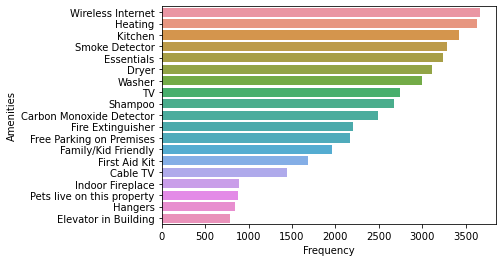

In [55]:
sns.barplot(x = 'Frequency', y= 'Amenities', data=x[1:20]);

#plt.set_xticks(rotation = 45)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

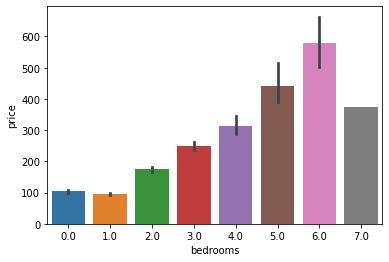

In [60]:
sns.barplot(x= 'bedrooms', y= 'price', data= df_selected_features)

<AxesSubplot:xlabel='beds', ylabel='price'>

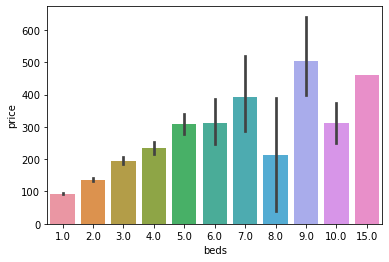

In [61]:
sns.barplot(x= 'beds', y= 'price', data= df_selected_features)

<AxesSubplot:xlabel='guests_included', ylabel='price'>

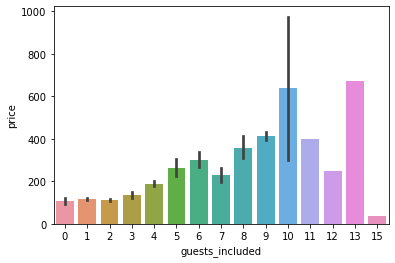

In [62]:
sns.barplot(x= 'guests_included', y= 'price', data= df_selected_features)

<AxesSubplot:xlabel='accommodates', ylabel='price'>

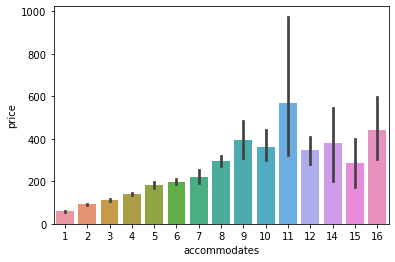

In [58]:
sns.barplot(x= 'accommodates', y= 'price', data= df_selected_features)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

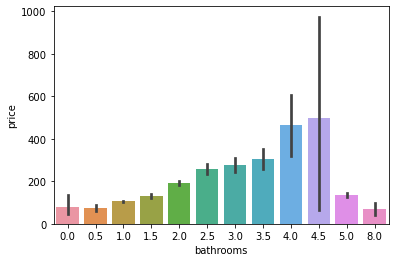

In [59]:
sns.barplot(x= 'bathrooms', y= 'price', data= df_selected_features)

**Plotting Maps with Folium**

In [66]:
!pip install folium

In [67]:
#import the library
import folium
from folium.plugins import MarkerCluster

In [83]:
#Create a Map object and center it to the average coordinates to m
m = folium.Map(location=df_selected_features[['latitude', 'longitude']].mean().to_list(), zoom_start=2)

In [84]:
marker_cluster = MarkerCluster().add_to(m)

In [85]:
for i,r in df_selected_features.iterrows():
    location = (r['latitude'], r['longitude'])
    folium.Marker(location=location, tooltip=r['price'])\
    .add_to(marker_cluster)

In [86]:
m

In [64]:
df_selected_features[['latitude', 'longitude']]


,latitude,longitude
0,47.636289,-122.371025
1,47.639123,-122.365666
2,47.629724,-122.369483
3,47.638473,-122.369279
4,47.632918,-122.372471
...,...,...
3813,47.664295,-122.359170
3814,47.649552,-122.318309
3815,47.508453,-122.240607
3816,47.632335,-122.275530


<AxesSubplot:>

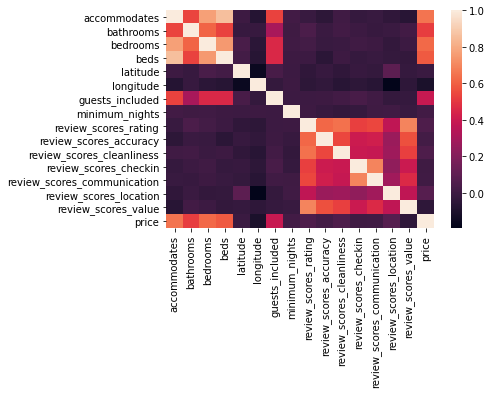

In [51]:
sns.heatmap(df_selected_features.corr())

In [54]:
df_selected_features.corr()['price']

accommodates                   0.652218
bathrooms                      0.516424
bedrooms                       0.627720
beds                           0.589525
latitude                      -0.008904
longitude                     -0.102420
guests_included                0.392875
minimum_nights                 0.017297
review_scores_rating           0.055551
review_scores_accuracy         0.019026
review_scores_cleanliness      0.054357
review_scores_checkin          0.007877
review_scores_communication    0.012990
review_scores_location         0.075069
review_scores_value           -0.041776
price                          1.000000
Name: price, dtype: float64

In [16]:
#amenities_dict

#{'Internet', 'Washer/Dryer', 'Air Conditioning', 'Carbon Monoxide Detector', 'Cat(s)/Dog(s)/Other pet(s)', 'Doorman', 'Elevator in Building',
#'First Aid Kit', 'Fire Extinguisher', 'Essentials', 'Hair Dryer', '24-Hour Check-in', 'Breakfast', 'Gym'}

{'': 3818,
 '24-Hour Check-in': 616,
 'Air Conditioning': 677,
 'Breakfast': 291,
 'Buzzer/Wireless Intercom': 538,
 'Cable TV': 1446,
 'Carbon Monoxide Detector': 2485,
 'Cat(s)': 382,
 'Dog(s)': 509,
 'Doorman': 85,
 'Dryer': 3114,
 'Elevator in Building': 785,
 'Essentials': 3237,
 'Family/Kid Friendly': 1963,
 'Fire Extinguisher': 2196,
 'First Aid Kit': 1680,
 'Free Parking on Premises': 2167,
 'Gym': 442,
 'Hair Dryer': 774,
 'Hangers': 846,
 'Heating': 3627,
 'Hot Tub': 303,
 'Indoor Fireplace': 886,
 'Internet': 3692,
 'Iron': 742,
 'Kitchen': 3423,
 'Laptop Friendly Workspace': 745,
 'Lock on Bedroom Door': 100,
 'Other pet(s)': 51,
 'Pets Allowed': 472,
 'Pets live on this property': 883,
 'Pool': 159,
 'Safety Card': 727,
 'Shampoo': 2670,
 'Smoke Detector': 3281,
 'Smoking Allowed': 82,
 'Suitable for Events': 209,
 'TV': 2741,
 'Washer': 2992,
 'Washer / Dryer': 2,
 'Wheelchair Accessible': 300,
 'Wireless Internet': 3667}

In [17]:
'Other pet(s)' in 'Cat/Dog/Other pet(s)' 

True

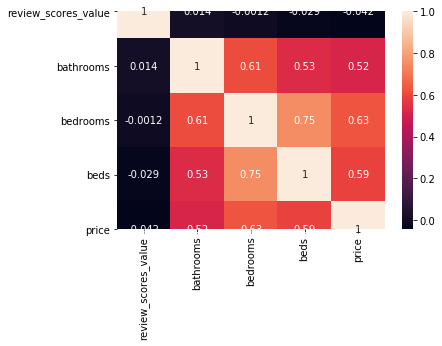

In [53]:
sns.heatmap(df_lst_seattle[['review_scores_value', 'amenities', 'neighbourhood', 'neighbourhood_cleansed', 'cleaning_fee', 'bathrooms', 'bedrooms', 'beds', 'price']].corr(), annot = True)

In [56]:
df_lst_seattle.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [81]:
df_lst_seattle['cleaning_fee'] = df_lst_seattle['cleaning_fee'].apply(lambda x : money_to_float(x))

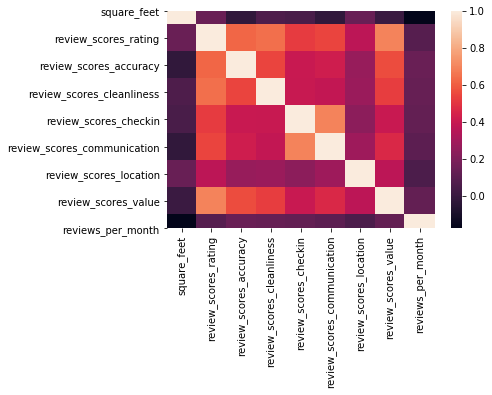

In [42]:
sns.heatmap(df_lst_seattle[df_lst_seattle.columns[df_lst_seattle.isnull().sum()/df_lst_seattle.shape[0] > .05]].corr())

In [37]:
df_lst_seattle.dropna(how='all', axis='columns', inplace= True)


df_lst_seattle.dropna(subset=['price'], axis=0, inplace= True)

In [40]:
df_lst_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [ ]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [53]:
df_lst_seattle['price'].describe()

df_lst_seattle.iloc[np.argmin(df_lst_seattle['price'])]

id                                                               10310373
listing_url                         https://www.airbnb.com/rooms/10310373
scrape_id                                                  20160104002432
last_scraped                                                   2016-01-04
name                                        Cozy, cute, Queen Anne living
                                                    ...                  
cancellation_policy                                              flexible
require_guest_profile_picture                                           f
require_guest_phone_verification                                        f
calculated_host_listings_count                                          1
reviews_per_month                                                     NaN
Name: 53, Length: 92, dtype: object

In [119]:
df_rvs_seattle.groupby('listing_id')['comments'].apply(lambda x: list(x))

listing_id
4291        [We had a great stay in Seattle, great locatio...
5682        [Very sweet outgoing host with a nice family a...
6606        [The Urban Cottage is comfortable, beautiful, ...
7369        [I was staying with Shireen for a weekend and ...
9419        [If you love art, animals, and yoga, this is t...
                                  ...                        
9995551     [Awesome host! The cottage is nice and clean a...
10012724    [This is a prime location of walking distance ...
10020221    [Awesome room! Thanks for the kindness and let...
10118341    [My mom and I came for a 4 day trip and had a ...
10248139    [I was able to book on the last minute and wor...
Name: comments, Length: 3191, dtype: object

In [ ]:
#Date x Booking prices

In [ ]:
#features that impact in the pricing

In [ ]:
#location x pricing

In [ ]:
#review and rating x price 

In [ ]:
#Price x amenities and features x location